# Clustering Categorical Data 

You are given much more country data. Using the same methodology as the one in the lecture, group all the countries in 2 clusters. 

<b> Already done that? Okay! </b>
    
There are other features: name and continent. 

Encode the continent one and use it in the clustering solution. Think about the difference with the previous exercise.

## Import the relevant libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'Categorical.csv'</i>.

In [5]:
data = pd.read_excel('dados nao supervisionados.xlsx')
data.drop(columns='Unnamed: 0', inplace=True)
data

,DS_GENERO,DS_OCUPACAO,DS_COR_RACA,DS_GRAU_INSTRUCAO,ST_DECLARAR_BENS,DS_SIT_TOT_TURNO
0,MASCULINO,SERVIDOR PÚBLICO MUNICIPAL,PARDA,SUPERIOR COMPLETO,S,SUPLENTE
1,MASCULINO,SERVIDOR PÚBLICO MUNICIPAL,PRETA,ENSINO MÉDIO COMPLETO,S,SUPLENTE
2,MASCULINO,OUTROS,PARDA,ENSINO MÉDIO INCOMPLETO,S,NÃO ELEITO
3,MASCULINO,OUTROS,BRANCA,ENSINO MÉDIO COMPLETO,S,SUPLENTE
4,FEMININO,AGRICULTOR,PRETA,ENSINO MÉDIO COMPLETO,S,SUPLENTE
...,...,...,...,...,...,...
9003,MASCULINO,ODONTÓLOGO,PARDA,SUPERIOR COMPLETO,S,ELEITO POR QP
9004,MASCULINO,VEREADOR,PARDA,ENSINO MÉDIO COMPLETO,S,SUPLENTE
9005,MASCULINO,"ESTUDANTE, BOLSISTA, ESTAGIÁRIO E ASSEMELHADOS",BRANCA,SUPERIOR INCOMPLETO,S,NÃO ELEITO
9006,MASCULINO,AGRICULTOR,BRANCA,ENSINO FUNDAMENTAL INCOMPLETO,S,SUPLENTE


In [7]:
data['DS_SIT_TOT_TURNO'].value_counts()

SUPLENTE            5051
NÃO ELEITO          2187
ELEITO POR QP       1230
ELEITO POR MÉDIA     371
ELEITO               169
Name: DS_SIT_TOT_TURNO, dtype: int64

## Map the data

Use the <i>'continent'</i> category for this analysis.

In [75]:
data_mapped = data.copy()
data_mapped['DS_SIT_TOT_TURNO'] = data_mapped['DS_SIT_TOT_TURNO'].map({'SUPLENTE':0,'NÃO ELEITO':1,'ELEITO POR QP':2,'ELEITO POR MÉDIA':2,'ELEITO':2})
data_mapped['DS_GENERO'] = data_mapped['DS_GENERO'].map({'MASCULINO':0, 'FEMININO':1})
data_mapped['DS_COR_RACA'] = data_mapped['DS_COR_RACA'].map({'PARDA':0, 'BRANCA':1, 'PRETA':2, 'AMARELA':3, 'INDÍGENA':4,'SEM INFORMAÇÃO':5})
data_mapped

,DS_GENERO,DS_OCUPACAO,DS_COR_RACA,DS_GRAU_INSTRUCAO,ST_DECLARAR_BENS,DS_SIT_TOT_TURNO
0,0,SERVIDOR PÚBLICO MUNICIPAL,0,SUPERIOR COMPLETO,S,0
1,0,SERVIDOR PÚBLICO MUNICIPAL,2,ENSINO MÉDIO COMPLETO,S,0
2,0,OUTROS,0,ENSINO MÉDIO INCOMPLETO,S,1
3,0,OUTROS,1,ENSINO MÉDIO COMPLETO,S,0
4,1,AGRICULTOR,2,ENSINO MÉDIO COMPLETO,S,0
...,...,...,...,...,...,...
9003,0,ODONTÓLOGO,0,SUPERIOR COMPLETO,S,2
9004,0,VEREADOR,0,ENSINO MÉDIO COMPLETO,S,0
9005,0,"ESTUDANTE, BOLSISTA, ESTAGIÁRIO E ASSEMELHADOS",1,SUPERIOR INCOMPLETO,S,1
9006,0,AGRICULTOR,1,ENSINO FUNDAMENTAL INCOMPLETO,S,0


In [76]:
data_mapped['DS_GRAU_INSTRUCAO']= data_mapped['DS_GRAU_INSTRUCAO'].map({'ENSINO MÉDIO COMPLETO':0, 'SUPERIOR COMPLETO':1, 'ENSINO FUNDAMENTAL INCOMPLETO':2, 'ENSINO FUNDAMENTAL COMPLETO':3, 'ENSINO MÉDIO INCOMPLETO':4,'SUPERIOR INCOMPLETO':5, 'LÊ E ESCREVE':6})

In [78]:
data_mapped['DS_OCUPACAO'].value_counts()

OUTROS                        1535
AGRICULTOR                    1083
VEREADOR                       762
SERVIDOR PÚBLICO MUNICIPAL     592
COMERCIANTE                    570
                              ... 
BOMBEIRO MILITAR                 1
ARQUEÓLOGO                       1
AGENTE DE VIAGEM                 1
CHAVEIRO                         1
TERAPEUTA                        1
Name: DS_OCUPACAO, Length: 167, dtype: int64

## Select the features

In [13]:
x = data_mapped.iloc[:,5:6]
#x = data_mapped['DS_SIT_TOT_TURNO']
x

,DS_SIT_TOT_TURNO
0,0
1,0
2,1
3,0
4,0
...,...
9003,2
9004,0
9005,1
9006,0


## Clustering

Use 4 clusters initially.

In [14]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Clustering results

In [15]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 1, ..., 1, 0, 1], dtype=int32)

In [16]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters
data_with_clusters

,DS_GENERO,DS_OCUPACAO,DS_COR_RACA,DS_GRAU_INSTRUCAO,ST_DECLARAR_BENS,DS_SIT_TOT_TURNO,Clusters
0,MASCULINO,SERVIDOR PÚBLICO MUNICIPAL,PARDA,SUPERIOR COMPLETO,S,SUPLENTE,0
1,MASCULINO,SERVIDOR PÚBLICO MUNICIPAL,PRETA,ENSINO MÉDIO COMPLETO,S,SUPLENTE,0
2,MASCULINO,OUTROS,PARDA,ENSINO MÉDIO INCOMPLETO,S,NÃO ELEITO,1
3,MASCULINO,OUTROS,BRANCA,ENSINO MÉDIO COMPLETO,S,SUPLENTE,0
4,FEMININO,AGRICULTOR,PRETA,ENSINO MÉDIO COMPLETO,S,SUPLENTE,0
...,...,...,...,...,...,...,...
9003,MASCULINO,ODONTÓLOGO,PARDA,SUPERIOR COMPLETO,S,ELEITO POR QP,2
9004,MASCULINO,VEREADOR,PARDA,ENSINO MÉDIO COMPLETO,S,SUPLENTE,0
9005,MASCULINO,"ESTUDANTE, BOLSISTA, ESTAGIÁRIO E ASSEMELHADOS",BRANCA,SUPERIOR INCOMPLETO,S,NÃO ELEITO,1
9006,MASCULINO,AGRICULTOR,BRANCA,ENSINO FUNDAMENTAL INCOMPLETO,S,SUPLENTE,0


In [18]:
data['DS_COR_RACA'].value_counts()

PARDA             4415
BRANCA            3684
PRETA              784
SEM INFORMAÇÃO      87
AMARELA             29
INDÍGENA             9
Name: DS_COR_RACA, dtype: int64

## Plot the data

<function matplotlib.pyplot.show(*args, **kw)>

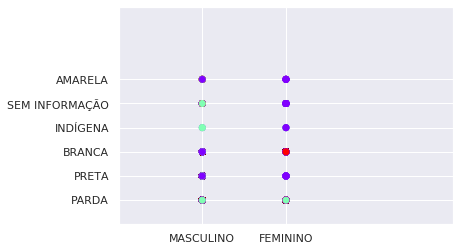

In [66]:
plt.scatter(data['DS_GENERO'], data['DS_COR_RACA'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,0], c='black')
plt.xlim(-1,3)
plt.ylim(-1,8)
plt.show

In [68]:
kmeans.cluster_centers_

array([[-8.0380147e-14],
       [ 1.0000000e+00],
       [ 2.0000000e+00]])

Since you already have all the code necessary, go back and play around with the number of clusters. Try 3, 7 and 8 and see if the results match your expectations. 

Simply go back to the beggining of the <b> Clustering </b> section and change <i> kmeans = KMeans(4) </i> to <i> kmeans = KMeans(3) </i>. Then run the remaining cells until the end.